## System

Consider a Goodwin-style model with a putty-clay production function and two classes of labor, with different relative productivities on machines of different capital-labor ratio and with independent wages uniquely determined by each class's employment rate.

We have accounting identities
$$\begin{align}
Y &= \sum_j \int_{K_j} \epsilon_j(\kappa) f(\kappa) l(\kappa) \text{ d}\kappa \\
I = \Pi &= Y - \sum_j \int_{K_j} w_j l(\kappa) \text{ d}\kappa\\
\dot{l}(\kappa) &= I \delta(\kappa - \kappa_{\text{opt}}) / \kappa,
\end{align}$$
wage determination
$$w_i = \omega\left(\frac{1}{N_i}\int_{K_i} l(\kappa) \text{ d}\kappa\right),$$
and return-maximisation identities
$$\begin{align}
K_i & = \{\kappa|\epsilon_i(\kappa) f(\kappa) - w_i \ge \max(0, \epsilon_j(\kappa) f(\kappa) - w_j)\} \\
\kappa_{\text{opt}} &= \text{argmax}_{\kappa} \max \{\epsilon_j(\kappa) f(\kappa) - w_j\}_j
\end{align}$$

## Steady state, without exogeneous change

In the steady state, with investment concentrated at and divided between technologies with capital-labor ratios $\kappa_0$ and $\kappa_1$, with proportions $\iota_0$ and $\iota_1 = 1 - \iota_0$ going to each, we have accounting identities
$$\begin{align}
Y &= \sum_j \epsilon_j(\kappa_j) f(\kappa_j) L_j \\
I = \Pi &= Y - \sum_j w_j L_j \\
0 = \dot{L}_i &=\frac{\iota_i}{\kappa_i} I - \delta L_i
\end{align}$$
and return-maximisation identities
$$\begin{align}
w_i &= \epsilon_i(\kappa_i) f(\kappa_i) - \kappa_i (\epsilon_i f)'(\kappa_i) \\
\frac{\kappa_1}{\kappa_0} &= \frac{\epsilon_1(\kappa_1) f(\kappa_1) - w_1}{\epsilon_0(\kappa_0) f(\kappa_0) - w_0}.
\end{align}$$

Consequently,
$$\begin{align}
\delta(\kappa_0 L_0 + \kappa_1 L_1) = I &= \sum_j \left[\epsilon_j(\kappa_j) f(\kappa_j) - w_j\right] L_j \\
    &= \kappa_0 (\epsilon_0 f)'(\kappa_0)\left[L_0 + \frac{\kappa_1}{\kappa_0} L_1\right]
\end{align}$$
so the capital-labor ratios are determined by the need to satisfy
$$(\epsilon_0 f)'(\kappa_0) = (\epsilon_1 f)'(\kappa_1) = \delta.$$
Since, at this steady state,
$$\partial_{\kappa}^2 \frac{\epsilon(\kappa) f(\kappa) - w}{\kappa} = \frac{(\epsilon_i f)''(\kappa_i)}{\kappa_i},$$
the derivative $(\epsilon_i f)'$ must be decreasing at $\kappa_i$ for the steady state to be stable.

With the steady state's techonology's capital-labor ratios fixed, its wages are determined by the return-maximisation identities, determining its total employment through the wage-unemployment relation. All other properties are then determined by these.

In [1]:
import _core
import _plots
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

w0 = 1e4
hub = _core.Hub('two-track_labor')
hub.run()
sol = hub.get_dparam(returnas=dict)
delta = sol['delta']['value']
N = sol['N']['value'][0, 0]
t = sol['time']['value']
kappa = sol['kl_ratios']['value']
f = sol['productivity_fn']['value']
eps = sol['labor_effectiveness']['value']
w = sol['w']['value']
labor_density = sol['labor_density']['value']

lognormal = lambda kappa_0: sol['I_distribution']['func'](kappa_0, sol['kl_sigma']['value'], kappa)

Suggested order for intermediary functions (func_order):
['labor_employed', 'kl_optimum', 'I_distribution', 'GDP', 'L', 'Pi', 'I']


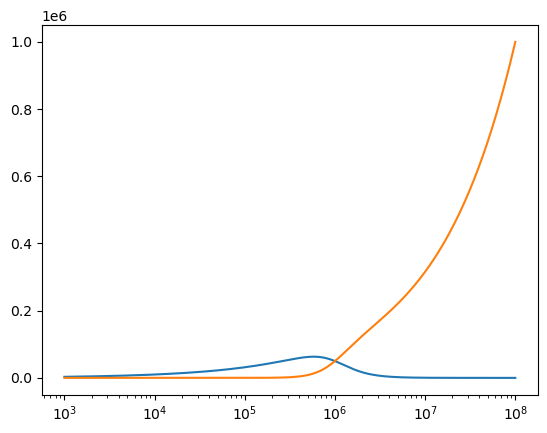

In [7]:
plt.semilogx(kappa, eps[0] * f)
plt.semilogx(kappa, eps[1] * f)
plt.show()

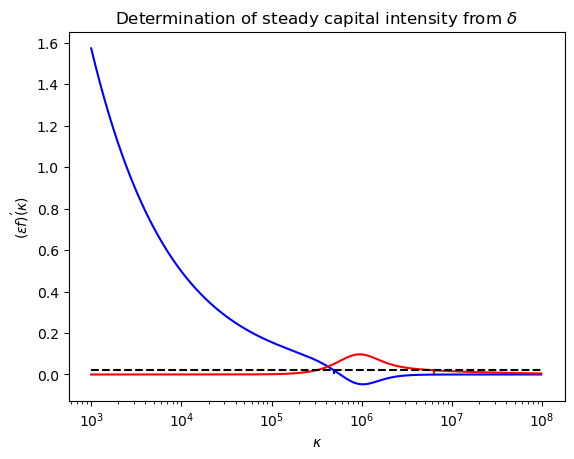

Theoretical $\kappa_\infty$: [ 489778.81936845 6309573.44480194]


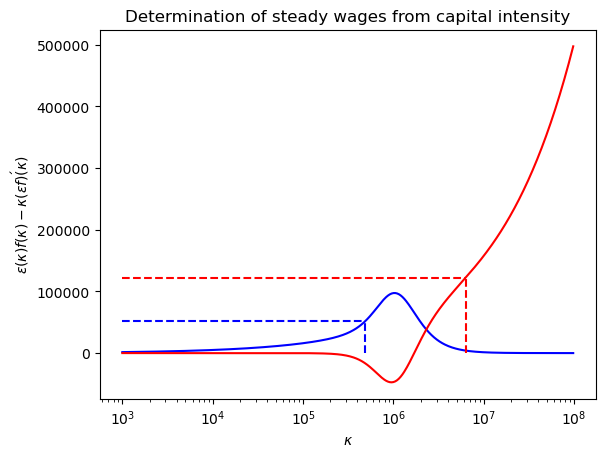

Theoretical $w_\infty$: [ 51993.00348515 122284.07834971]
Theoretical $L_\infty$: [2516074.42270182 2773215.33797369]


In [2]:
eps_f_dash = np.diff(eps * f, axis=1) / np.diff(kappa)
ids_inf = np.argmax((eps_f_dash[:,:-1] > delta) * (eps_f_dash[:,1:] <= delta), axis=1)
kappa_inf = kappa[ids_inf]

plt.semilogx(kappa[:-1], eps_f_dash[0], '-b',
             kappa[:-1], eps_f_dash[1], '-r',
             [kappa.min(), kappa.max()], delta * np.ones(2), '--k',
             kappa_inf[0] * np.ones(2), [0, delta], '--b',
             kappa_inf[1] * np.ones(2), [0, delta], '--r')
plt.title(r'Determination of steady capital intensity from $\delta$')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$(\epsilon f)\'(\kappa)$')
plt.show()
print(r'Theoretical $\kappa_\infty$: {}'.format(kappa_inf))

wage_required = (eps * f)[:,:-1] - kappa[:-1] * np.diff(eps * f, axis=1) / np.diff(kappa)
w_inf = np.array([wage_required[labor_class, ids_inf[labor_class]] for labor_class in range(2)])

plt.semilogx(kappa[:-1], wage_required[0], '-b',
             kappa[:-1], wage_required[1], '-r',
             kappa_inf[0] * np.ones(2), [0, w_inf[0]], '--b',
             [kappa.min(), kappa_inf[0]], w_inf[0] * np.ones(2), '--b',
             kappa_inf[1] * np.ones(2), [0, w_inf[1]], '--r',
             [kappa.min(), kappa_inf[1]], w_inf[1] * np.ones(2), '--r')
plt.title(r'Determination of steady wages from capital intensity')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\epsilon(\kappa)f(\kappa) - \kappa (\epsilon f)\'(\kappa)$')
plt.show()
print(r'Theoretical $w_\infty$: {}'.format(w_inf))

L_inf = w_inf / (w0 + w_inf) * N
labor_density_inf = L_inf[0] * lognormal(kappa_inf[0]) + L_inf[1] * lognormal(kappa_inf[1])

print(r'Theoretical $L_\infty$: {}'.format(L_inf))

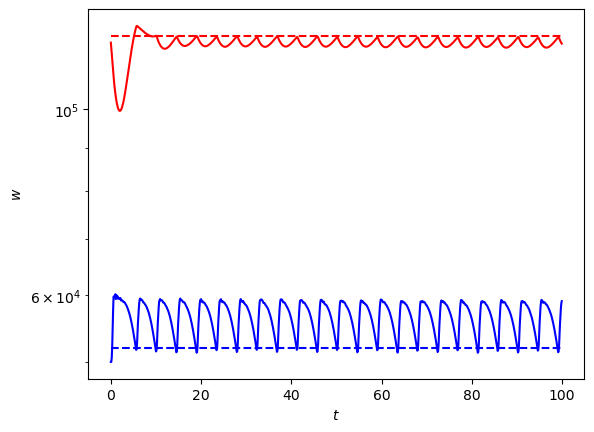

<ipython-input-3-6dfc6dbd9f1b>:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([labor_density[-1,0,0], 10 * labor_density_inf.max()])


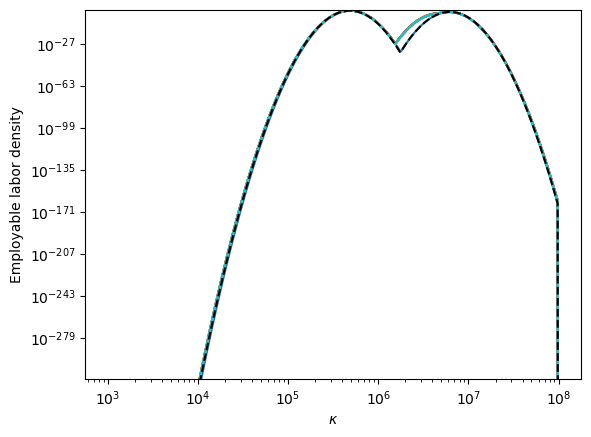

In [3]:
plt.semilogy(t, w[..., 0], '-b',
             t, w[..., 1], '-r',
             [t.min(), t.max()], w_inf[0] * np.ones(2), '--b',
             [t.min(), t.max()], w_inf[1] * np.ones(2), '--r')
plt.xlabel(r'$t$')
plt.ylabel(r'$w$')
plt.show()

for id in range(0, t.size, int(t.size / 10)):
    plt.loglog(kappa, labor_density[id, 0])
plt.loglog(kappa, labor_density_inf, '--k')
plt.xlabel(r'$\kappa$')
plt.ylabel(r'Employable labor density')
plt.ylim([labor_density[-1,0,0], 10 * labor_density_inf.max()])
plt.show()

## Quasi-steady state, with exogeneous change

If the population of each labor class grows proportionately, at a constant rate $\beta$, the same analysis holds as above, except with $L$ replaced by rescaled labor $Le^{-\beta t}$ and $\delta$ therefore replaced with $\beta + \delta$. Changes in $\beta + \delta$, however, will change the steady state. Since $(\epsilon_i f)'$ must be decreasing at $\kappa_i$, decreasing $\beta + \delta$ will increase $\kappa_i$, with longer-lived capital permitting technology with higher capital intensity to be return-maximising. Since $\partial_\kappa \left[\epsilon f - \kappa (\epsilon f)'\right] = -\kappa (\epsilon f)''$, this will correspond to an increase in wages, with higher labor productivity permitting more investment and higher employment. The same effect will be seen if technical change increases $f(\kappa)$ by a constant factor, whether by decreasing the cost of technology with a given labor productivity $f$ or increasing the output of technology with a given capital-labor intensity $\kappa$.

However, the benefits will not accrue equally to different labor classes. Specifically, a decrease in $\delta$ by $\Delta \delta$, or increase in $f(\kappa)$ by a factor $1 + \Delta$, will correspond to an increase in the steady state wage $w_i$ by, to first order
$$\begin{align}
\partial_\kappa \left[\epsilon f - \kappa (\epsilon f)'\right] \partial_\delta \left[(\epsilon_i f)'^{-1}(\delta)\right] (-\Delta \delta) &= \frac{\kappa_i (\epsilon_i f)''}{(\epsilon_i f)''} \Delta \delta \\
    &= \Delta \delta \kappa_i.
\end{align}$$
If $f(\kappa) = \hat{f} \zeta(\kappa / \hat{\kappa})$ for dimensionless function $\zeta$, we can describe the system by dimensionless quantity $\hat{f}/\delta\hat{\kappa}$.

In [4]:
hub = _core.Hub('two-track_labor_progress')
hub.run()
sol = hub.get_dparam(returnas=dict)
delta = sol['delta']['value']
N = sol['N']['value'][0, 0]
t = sol['time']['value']
kappa = sol['kl_ratios']['value']
f = sol['productivity_fn']['value']
eps = sol['labor_effectiveness']['value']
w = sol['w']['value']
labor_density = sol['labor_density']['value']

lognormal = lambda kappa_0: sol['I_distribution']['func'](kappa_0, sol['kl_sigma']['value'], kappa)

Suggested order for intermediary functions (func_order):
['labor_employed', 'kl_optimum', 'I_distribution', 'GDP', 'L', 'Pi', 'I']


In [5]:
def plot_theory(delta):
    ids_inf = np.argmax((eps_f_dash[:,:-1] > delta) * (eps_f_dash[:,1:] <= delta), axis=1)
    kappa_inf = kappa[ids_inf]

    plt.semilogx(kappa[:-1], eps_f_dash[0], '-b',
                 kappa[:-1], eps_f_dash[1], '-r',
                 [kappa.min(), kappa.max()], delta * np.ones(2), '--k',
                 kappa_inf[0] * np.ones(2), [0, delta], '--b',
                 kappa_inf[1] * np.ones(2), [0, delta], '--r')
    plt.title(r'Determination of steady capital intensity from $\delta$')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$(\epsilon f)\'(\kappa)$')
    plt.show()
    print(r'Theoretical $\kappa_\infty$: {}'.format(kappa_inf))

    wage_required = (eps * f)[:,:-1] - kappa[:-1] * np.diff(eps * f, axis=1) / np.diff(kappa)
    w_inf = np.array([wage_required[labor_class, ids_inf[labor_class]] for labor_class in range(2)])

    plt.semilogx(kappa[:-1], wage_required[0], '-b',
                 kappa[:-1], wage_required[1], '-r',
                 kappa_inf[0] * np.ones(2), [0, w_inf[0]], '--b',
                 [kappa.min(), kappa_inf[0]], w_inf[0] * np.ones(2), '--b',
                 kappa_inf[1] * np.ones(2), [0, w_inf[1]], '--r',
                 [kappa.min(), kappa_inf[1]], w_inf[1] * np.ones(2), '--r')
    plt.title(r'Determination of steady wages from capital intensity')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\epsilon(\kappa)f(\kappa) - \kappa (\epsilon f)\'(\kappa)$')
    plt.show()
    print(r'Theoretical $w_\infty$: {}'.format(w_inf))
    
interact_manual(plot_theory, delta=(0, 0.1, 0.001))

interactive(children=(FloatSlider(value=0.05, description='delta', max=0.1, step=0.001), Button(description='R…

<function __main__.plot_theory(delta)>

Write $f = \hat{f} F(\kappa / \hat{\kappa})$ for constant $F$. For continuously evolving $\hat{f}/(\beta + \delta) \hat{\kappa}$, the system oscillates around the evolving quasi-steady state.

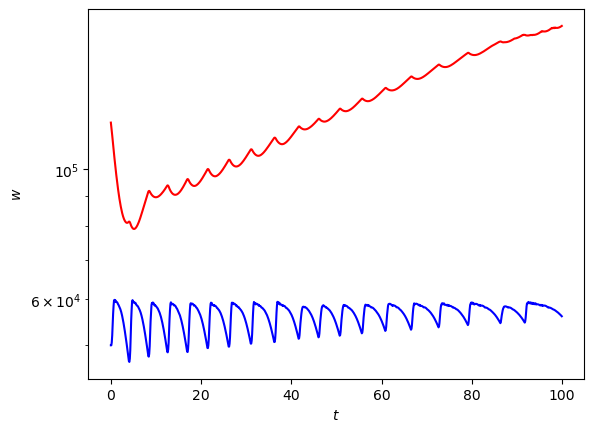

<ipython-input-6-8f4fa6f107c3>:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([labor_density[-1,0,0], 10 * labor_density_inf.max()])


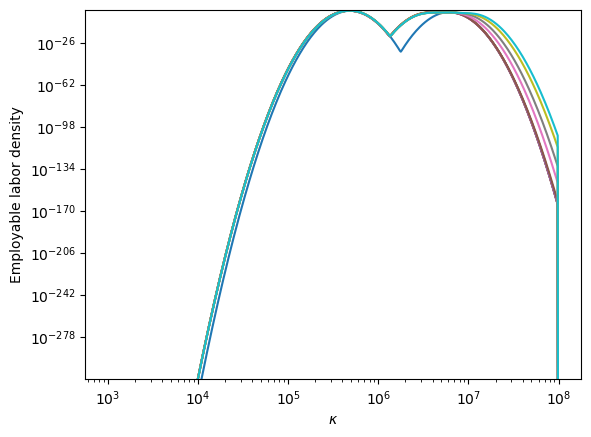

In [6]:
plt.semilogy(t, w[..., 0], '-b',
             t, w[..., 1], '-r')
plt.xlabel(r'$t$')
plt.ylabel(r'$w$')
plt.show()

for id in range(0, t.size, int(t.size / 10)):
    plt.loglog(kappa, labor_density[id, 0])
plt.xlabel(r'$\kappa$')
plt.ylabel(r'Employable labor density')
plt.ylim([labor_density[-1,0,0], 10 * labor_density_inf.max()])
plt.show()

Possibilities:
- Add firm debt (get Keen bad equilibrium dynamics)
- Add debt of each labor class (cf Grasselli, Giraud)